In [105]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import graphviz
import pydot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
tf.__version__
import sklearn
print(sklearn.__version__)

0.23.1


In [106]:
def read(file):
    return pd.read_csv(file)

#features.set_index(['Index'], inplace = True)
#features.drop(columns = ['Index'], inplace = True)

features = read('F_forward_features_actual.csv')
features.head(5)

,n [count],α [°],H [mm],DR [ ],f
0,3,15,90.0,0.8,0.798799
1,3,15,90.0,0.8,0.782783
2,6,15,90.0,0.8,0.887888
3,6,15,90.0,0.8,0.887888
4,F,15,90.0,0.8,0.955956


In [107]:
if 'n [count]' in features.columns and 'Material' in features.columns:
    features = pd.get_dummies(features, columns = ['n [count]', 'Material'])
elif 'n [count]' in features.columns:
    features = pd.get_dummies(features, columns = ['n [count]'])
elif 'Material' in features.columns:
    features = pd.get_dummies(features, columns = ['Material'])

In [108]:
def print_shape(data):
    print("The shape of our feature is " + str(data.shape))

print_shape(features)

# Calculate the threshold
np_array = np.array(features)
print(np_array)
np_array = np_array[:,5]
threshold = np.mean(np_array)
print(threshold)
#print(np_array)

The shape of our feature is (177, 10)
[[ 15.   90.    0.8 ...   0.    0.    0. ]
 [ 15.   90.    0.8 ...   0.    0.    0. ]
 [ 15.   90.    0.8 ...   1.    0.    0. ]
 ...
 [ 30.  180.    0.8 ...   1.    0.    0. ]
 [ 60.  180.    0.8 ...   0.    0.    0. ]
 [ 60.  180.    0.8 ...   1.    0.    0. ]]
0.022598870056497175


In [109]:
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181

In [110]:
#features = pd.get_dummies(features, columns = ['n [count]'])
#sc = StandardScaler()
#sc.fit(features)
#features = sc.transform(features)
#features = np.array(features)
#target pmax
pmax = np.array(features['f'])

#Remove labels from the features
features = features.drop('f', axis = 1)

#features = StandardScaler().fit_transform(features)

#pca = PCA(n_components = 11)
#principalComponents = pca.fit_transform(features)
#features = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
#display(features)
#print(pca.explained_variance_ratio_.cumsum())
features = np.array(features)
#Covert to numpy arrays
#features = np.array(features)
print(features)

print_shape(features)

[[ 15.   90.    0.8 ...   0.    0.    0. ]
 [ 15.   90.    0.8 ...   0.    0.    0. ]
 [ 15.   90.    0.8 ...   1.    0.    0. ]
 ...
 [ 30.  180.    0.8 ...   1.    0.    0. ]
 [ 60.  180.    0.8 ...   0.    0.    0. ]
 [ 60.  180.    0.8 ...   1.    0.    0. ]]
The shape of our feature is (177, 9)


In [111]:
#split the data into training set and testing set 
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)
print(train_features)

[[ 15.   90.    0.8 ...   1.    0.    0. ]
 [ 30.   90.    0.5 ...   0.    0.    1. ]
 [ 60.   90.    0.8 ...   0.    0.    0. ]
 ...
 [ 30.   90.    0.8 ...   1.    0.    0. ]
 [ 60.  157.5   0.8 ...   1.    0.    0. ]
 [ 45.  120.    0.5 ...   0.    0.    0. ]]


In [112]:
#Scaling the training set and the testing set
sc = StandardScaler()
sc.fit(train_features)
x_train = sc.transform(train_features)
x_test = sc.transform(test_features)

sc1 = StandardScaler()
sc1.fit(train_labels.reshape(-1,1))
train_labels = sc1.transform(train_labels.reshape(-1,1)).reshape(-1,1)
test_labels = sc1.transform(test_labels.reshape(-1,1)).reshape(-1,1)


#print(test_labels)


#Adding bias

x_train_std = np.insert(x_train, 0, 1, axis = 1)
x_test_std = np.insert(x_test, 0, 1, axis = 1)

print(x_train_std)
print(x_test_std)

#for i in range(test_labels.shape[0]):#
#    if test_labels[i] > threshold:
#        test_labels[i] = 1
#    else:
#        test_labels[i] = -1
#print(test_labels)

#for i in range(train_labels.shape[0]):
#    if train_labels[i] > threshold:
#        train_labels[i] = 1
#    else:
#        train_labels[i] = -1
#print(train_labels)





[[ 1.         -1.83607077 -0.61998584 ...  1.36732045 -0.12403473
  -0.58901509]
 [ 1.         -1.18804579 -0.61998584 ... -0.73135745 -0.12403473
   1.69774938]
 [ 1.          0.10800416 -0.61998584 ... -0.73135745 -0.12403473
  -0.58901509]
 ...
 [ 1.         -1.18804579 -0.61998584 ...  1.36732045 -0.12403473
  -0.58901509]
 [ 1.          0.10800416  1.74832019 ...  1.36732045 -0.12403473
  -0.58901509]
 [ 1.         -0.54002082  0.43259462 ... -0.73135745 -0.12403473
  -0.58901509]]
[[ 1.         -1.18804579 -0.61998584  0.46928497 -0.08737041 -0.15249857
  -0.73135745 -0.73135745  8.06225775 -0.58901509]
 [ 1.          0.10800416 -0.61998584  0.46928497 -0.08737041  6.55743852
  -0.73135745 -0.73135745 -0.12403473 -0.58901509]
 [ 1.          0.75602914 -0.61998584 -1.82499711 -0.08737041 -0.15249857
  -0.73135745  1.36732045 -0.12403473 -0.58901509]
 [ 1.         -0.54002082  1.48517508  0.46928497 -0.08737041 -0.15249857
   1.36732045 -0.73135745 -0.12403473 -0.58901509]
 [ 1.   

In [113]:
#Creating Neural network model
model = tf.keras.models.Sequential()

#input layer
model.add(tf.keras.layers.Flatten())
#Hidden layers
model.add(tf.keras.layers.Dense(6, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(4, activation = tf.nn.relu))

#Output layer
model.add(tf.keras.layers.Dense(1, activation = tf.nn.selu))



In [128]:
#Train
model.compile(optimizer = 'adam', loss= tf.keras.losses.MeanSquaredError(), metrics = ['mse'])
loss_list = []

for i in range(1):
    history = model.fit(x_train_std, train_labels, epochs = 1000)
    val_loss, val_acc = model.evaluate(x_test_std, test_labels)
    loss_list.append(val_loss)
print(loss_list)

Epoch 1/1000
132/132 [==============================] - 0s 1ms/sample - loss: 0.0701 - mean_squared_error: 0.0701
Epoch 2/1000
132/132 [==============================] - 0s 54us/sample - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 3/1000
132/132 [==============================] - 0s 50us/sample - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 4/1000
132/132 [==============================] - 0s 51us/sample - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 5/1000
132/132 [==============================] - 0s 67us/sample - loss: 0.0704 - mean_squared_error: 0.0704
Epoch 6/1000
132/132 [==============================] - 0s 97us/sample - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 7/1000
132/132 [==============================] - 0s 77us/sample - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 8/1000
132/132 [==============================] - 0s 65us/sample - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 9/1000
132/132 [==============================] - 0s 73us/sample - loss: 0.

132/132 [==============================] - 0s 53us/sample - loss: 0.0701 - mean_squared_error: 0.0701
Epoch 72/1000
132/132 [==============================] - 0s 54us/sample - loss: 0.0698 - mean_squared_error: 0.0698
Epoch 73/1000
132/132 [==============================] - 0s 55us/sample - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 74/1000
132/132 [==============================] - 0s 65us/sample - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 75/1000
132/132 [==============================] - 0s 46us/sample - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 76/1000
132/132 [==============================] - 0s 54us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 77/1000
132/132 [==============================] - 0s 42us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 78/1000
132/132 [==============================] - 0s 54us/sample - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 79/1000
132/132 [==============================] - 0s 43us/sample - loss: 0.0689

132/132 [==============================] - 0s 59us/sample - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 142/1000
132/132 [==============================] - 0s 52us/sample - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 143/1000
132/132 [==============================] - 0s 54us/sample - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 144/1000
132/132 [==============================] - 0s 61us/sample - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 145/1000
132/132 [==============================] - 0s 54us/sample - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 146/1000
132/132 [==============================] - 0s 65us/sample - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 147/1000
132/132 [==============================] - 0s 50us/sample - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 148/1000
132/132 [==============================] - 0s 68us/sample - loss: 0.0698 - mean_squared_error: 0.0698
Epoch 149/1000
132/132 [==============================] - 0s 79us/sample - loss

132/132 [==============================] - 0s 51us/sample - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 211/1000
132/132 [==============================] - 0s 51us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 212/1000
132/132 [==============================] - 0s 53us/sample - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 213/1000
132/132 [==============================] - 0s 70us/sample - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 214/1000
132/132 [==============================] - 0s 62us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 215/1000
132/132 [==============================] - 0s 53us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 216/1000
132/132 [==============================] - 0s 59us/sample - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 217/1000
132/132 [==============================] - 0s 49us/sample - loss: 0.0698 - mean_squared_error: 0.0698
Epoch 218/1000
132/132 [==============================] - 0s 54us/sample - loss

132/132 [==============================] - 0s 56us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 281/1000
132/132 [==============================] - 0s 51us/sample - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 282/1000
132/132 [==============================] - 0s 63us/sample - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 283/1000
132/132 [==============================] - 0s 49us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 284/1000
132/132 [==============================] - 0s 55us/sample - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 285/1000
132/132 [==============================] - 0s 49us/sample - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 286/1000
132/132 [==============================] - 0s 52us/sample - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 287/1000
132/132 [==============================] - 0s 52us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 288/1000
132/132 [==============================] - 0s 46us/sample - loss

132/132 [==============================] - 0s 55us/sample - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 351/1000
132/132 [==============================] - 0s 61us/sample - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 352/1000
132/132 [==============================] - 0s 65us/sample - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 353/1000
132/132 [==============================] - 0s 67us/sample - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 354/1000
132/132 [==============================] - 0s 62us/sample - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 355/1000
132/132 [==============================] - 0s 69us/sample - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 356/1000
132/132 [==============================] - 0s 66us/sample - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 357/1000
132/132 [==============================] - 0s 57us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 358/1000
132/132 [==============================] - 0s 62us/sample - loss

132/132 [==============================] - 0s 72us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 421/1000
132/132 [==============================] - 0s 53us/sample - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 422/1000
132/132 [==============================] - 0s 53us/sample - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 423/1000
132/132 [==============================] - 0s 71us/sample - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 424/1000
132/132 [==============================] - 0s 62us/sample - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 425/1000
132/132 [==============================] - 0s 50us/sample - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 426/1000
132/132 [==============================] - 0s 58us/sample - loss: 0.0701 - mean_squared_error: 0.0701
Epoch 427/1000
132/132 [==============================] - 0s 51us/sample - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 428/1000
132/132 [==============================] - 0s 59us/sample - loss

132/132 [==============================] - 0s 49us/sample - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 491/1000
132/132 [==============================] - 0s 70us/sample - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 492/1000
132/132 [==============================] - 0s 55us/sample - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 493/1000
132/132 [==============================] - 0s 53us/sample - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 494/1000
132/132 [==============================] - 0s 51us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 495/1000
132/132 [==============================] - 0s 56us/sample - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 496/1000
132/132 [==============================] - 0s 60us/sample - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 497/1000
132/132 [==============================] - 0s 55us/sample - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 498/1000
132/132 [==============================] - 0s 51us/sample - loss

132/132 [==============================] - 0s 87us/sample - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 561/1000
132/132 [==============================] - 0s 91us/sample - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 562/1000
132/132 [==============================] - 0s 70us/sample - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 563/1000
132/132 [==============================] - 0s 81us/sample - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 564/1000
132/132 [==============================] - 0s 62us/sample - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 565/1000
132/132 [==============================] - 0s 67us/sample - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 566/1000
132/132 [==============================] - 0s 122us/sample - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 567/1000
132/132 [==============================] - 0s 71us/sample - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 568/1000
132/132 [==============================] - 0s 70us/sample - los

132/132 [==============================] - 0s 61us/sample - loss: 0.0704 - mean_squared_error: 0.0704
Epoch 630/1000
132/132 [==============================] - 0s 74us/sample - loss: 0.0698 - mean_squared_error: 0.0698
Epoch 631/1000
132/132 [==============================] - ETA: 0s - loss: 0.0506 - mean_squared_error: 0.05 - 0s 76us/sample - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 632/1000
132/132 [==============================] - 0s 71us/sample - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 633/1000
132/132 [==============================] - 0s 82us/sample - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 634/1000
132/132 [==============================] - 0s 75us/sample - loss: 0.0698 - mean_squared_error: 0.0698
Epoch 635/1000
132/132 [==============================] - 0s 65us/sample - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 636/1000
132/132 [==============================] - 0s 58us/sample - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 637/1000
132/132 [===

132/132 [==============================] - 0s 64us/sample - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 699/1000
132/132 [==============================] - 0s 71us/sample - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 700/1000
132/132 [==============================] - 0s 89us/sample - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 701/1000
132/132 [==============================] - 0s 97us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 702/1000
132/132 [==============================] - 0s 63us/sample - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 703/1000
132/132 [==============================] - 0s 52us/sample - loss: 0.0700 - mean_squared_error: 0.0700
Epoch 704/1000
132/132 [==============================] - 0s 64us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 705/1000
132/132 [==============================] - 0s 55us/sample - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 706/1000
132/132 [==============================] - 0s 67us/sample - loss

132/132 [==============================] - 0s 62us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 769/1000
132/132 [==============================] - 0s 66us/sample - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 770/1000
132/132 [==============================] - 0s 66us/sample - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 771/1000
132/132 [==============================] - 0s 70us/sample - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 772/1000
132/132 [==============================] - 0s 88us/sample - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 773/1000
132/132 [==============================] - 0s 77us/sample - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 774/1000
132/132 [==============================] - 0s 63us/sample - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 775/1000
132/132 [==============================] - 0s 78us/sample - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 776/1000
132/132 [==============================] - 0s 86us/sample - loss

132/132 [==============================] - 0s 80us/sample - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 839/1000
132/132 [==============================] - 0s 66us/sample - loss: 0.0701 - mean_squared_error: 0.0701
Epoch 840/1000
132/132 [==============================] - 0s 146us/sample - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 841/1000
132/132 [==============================] - 0s 95us/sample - loss: 0.0712 - mean_squared_error: 0.0712
Epoch 842/1000
132/132 [==============================] - 0s 63us/sample - loss: 0.0704 - mean_squared_error: 0.0704
Epoch 843/1000
132/132 [==============================] - 0s 51us/sample - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 844/1000
132/132 [==============================] - 0s 74us/sample - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 845/1000
132/132 [==============================] - 0s 56us/sample - loss: 0.0686 - mean_squared_error: 0.0686
Epoch 846/1000
132/132 [==============================] - 0s 56us/sample - los

132/132 [==============================] - 0s 83us/sample - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 909/1000
132/132 [==============================] - 0s 90us/sample - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 910/1000
132/132 [==============================] - 0s 75us/sample - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 911/1000
132/132 [==============================] - 0s 87us/sample - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 912/1000
132/132 [==============================] - 0s 63us/sample - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 913/1000
132/132 [==============================] - 0s 61us/sample - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 914/1000
132/132 [==============================] - 0s 84us/sample - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 915/1000
132/132 [==============================] - 0s 72us/sample - loss: 0.0707 - mean_squared_error: 0.0707
Epoch 916/1000
132/132 [==============================] - 0s 72us/sample - loss

132/132 [==============================] - 0s 82us/sample - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 979/1000
132/132 [==============================] - 0s 59us/sample - loss: 0.0703 - mean_squared_error: 0.0703
Epoch 980/1000
132/132 [==============================] - 0s 66us/sample - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 981/1000
132/132 [==============================] - 0s 67us/sample - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 982/1000
132/132 [==============================] - 0s 56us/sample - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 983/1000
132/132 [==============================] - 0s 71us/sample - loss: 0.0686 - mean_squared_error: 0.0686
Epoch 984/1000
132/132 [==============================] - 0s 66us/sample - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 985/1000
132/132 [==============================] - 0s 49us/sample - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 986/1000
132/132 [==============================] - 0s 86us/sample - loss

In [115]:
val_loss, val_acc = model.evaluate(x_test_std, test_labels )
print(val_loss, val_acc)

45/45 [==============================] - 0s 61us/sample - loss: 0.2060 - mean_squared_error: 0.2060
0.20601541731092665 0.20601542


In [56]:
errors = np.sqrt(val_loss * 2)
mape = 100 * (errors / np.sum(test_labels **2))

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.01 %.


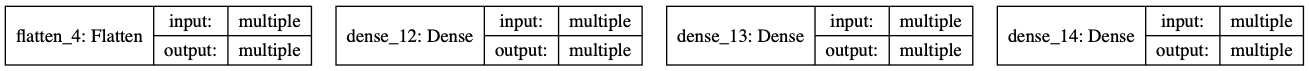

In [57]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)


In [58]:
predictions = model.predict(
    x_test_std,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    use_multiprocessing=False
)

print(predictions)
print(test_labels)

[[-0.5013468 ]
 [-0.49390993]
 [-0.7925932 ]
 [ 1.2366537 ]
 [-0.86822385]
 [ 0.04398227]
 [-0.80959404]
 [ 1.0473034 ]
 [-0.72345227]
 [-0.61462665]
 [-0.25622043]
 [-0.30185896]
 [-0.24312869]
 [-0.8476433 ]
 [-0.5633999 ]
 [-0.4947616 ]
 [-0.57650745]
 [-0.31939927]
 [-0.62814486]
 [ 0.2520147 ]
 [ 1.1531143 ]
 [-0.39138746]
 [ 0.22826304]
 [ 0.4927321 ]
 [ 0.96655613]
 [-0.5973089 ]
 [ 1.1627263 ]
 [-0.41724294]
 [ 2.2457805 ]
 [-0.18015963]
 [ 0.06875681]
 [-0.60936403]
 [-0.33821803]
 [-0.79197764]
 [ 1.0520537 ]
 [-0.37961   ]
 [ 0.40692338]
 [-0.820025  ]
 [-0.7824653 ]
 [ 0.09864639]
 [ 1.2974613 ]
 [-0.5629928 ]
 [ 0.4591178 ]
 [-0.5140583 ]
 [ 0.14727385]]
[[-4.21069585e-01]
 [-7.04525102e-01]
 [-7.45253018e-01]
 [ 8.08563341e-01]
 [-9.15083529e-01]
 [ 4.91843186e-02]
 [-8.26206425e-01]
 [ 1.26073778e+00]
 [-8.29705798e-01]
 [-5.68081991e-01]
 [-4.93808629e-01]
 [-2.44667035e-01]
 [-1.60694507e-01]
 [-9.32218576e-01]
 [-5.43383177e-01]
 [-4.81268268e-01]
 [-5.76736850e-01]
 

In [98]:
a = np.array(predictions)
error = 0
for i in range(45):
    error += np.abs(test_labels[i] - a[i][0])
# Calculate mean absolute percentage error
mape = 100 * (error / np.sum(test_labels**2))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', accuracy, '%.')

 

Accuracy: 75.82423165072815 %.


In [99]:
from nnv import NNV

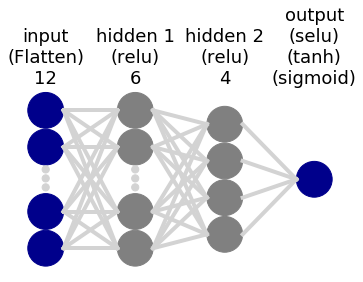

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2dbace10>)

In [100]:
layersList = [
    {"title":"input\n(Flatten)\n12", "units": 12, "color": "darkBlue"},
    {"title":"hidden 1\n(relu)\n6", "units": 6},
    {"title":"hidden 2\n(relu)\n4", "units": 4},
    {"title":"output\n(selu)\n(tanh)\n(sigmoid)", "units": 1,"color": "darkBlue"},
]

NNV(layersList).render(save_to_file="model_nn.png")

In [57]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

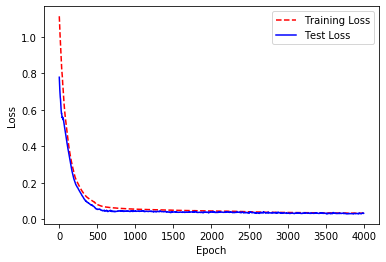

In [58]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
fig = plt.show();
plt.savefig('neural_network.png')
plt.close(fig)